## Gorle Manasa
## gripMay2021
## Task3-exploratory Data Analysis

In [1]:
#importing the required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#Reading the data into data frame
df = pd.read_csv('SampleSuperstore.csv')

In [50]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [52]:
df.tail()

,shipmode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,Westminster,California,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [51]:
#Renaming for our ouwn convinience
df.rename({'Ship Mode': 'shipmode'}, inplace = True, axis = 1)

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.shape

(9994, 13)

In [8]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### since it is all in one country we can drop country column and postal code is not of much use here

In [9]:
#Drop the least required columns 
df.drop(['Country','Postal Code'], inplace=True, axis=1)

In [10]:
df.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
s = df.groupby('City')


### As the number of cities are more than 500 the bar plot looks very tight 

<AxesSubplot:xlabel='City'>

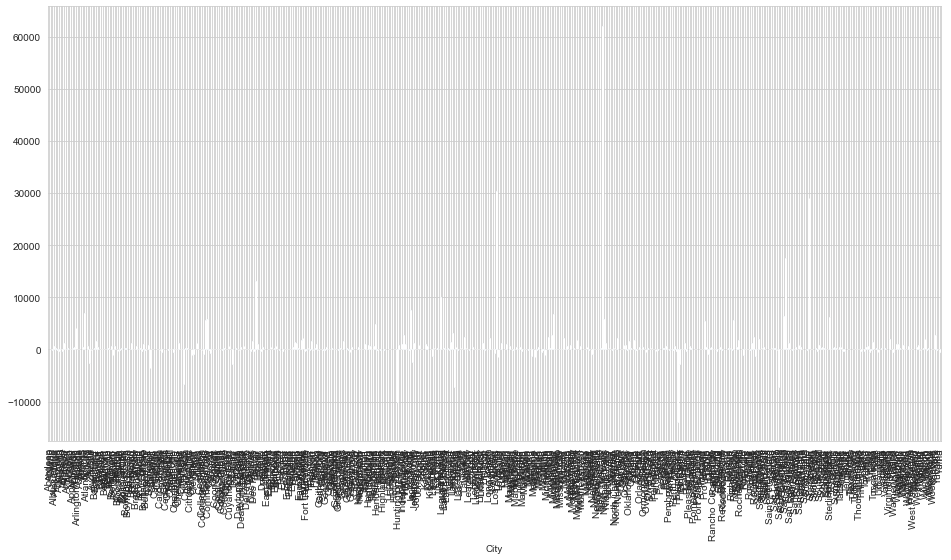

In [69]:
#Profit city wise
s = df.groupby('City')['Profit'].sum()
s.plot.bar(figsize = (16,8))

#### the mean of Profit regarding states 

<AxesSubplot:xlabel='State'>

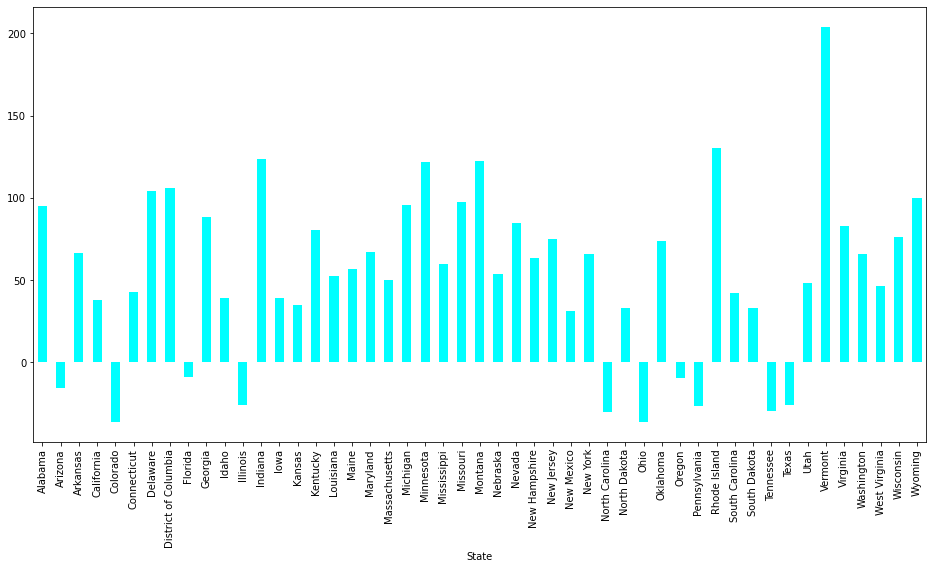

In [13]:
#profit of the stock market State wise
s = df.groupby('State')['Profit'].mean()
s.plot.bar(figsize = (16,8), color='cyan')

#### likewise we can get the sum 
#### we can find the difference between sum plot and a mean plot

<AxesSubplot:xlabel='State'>

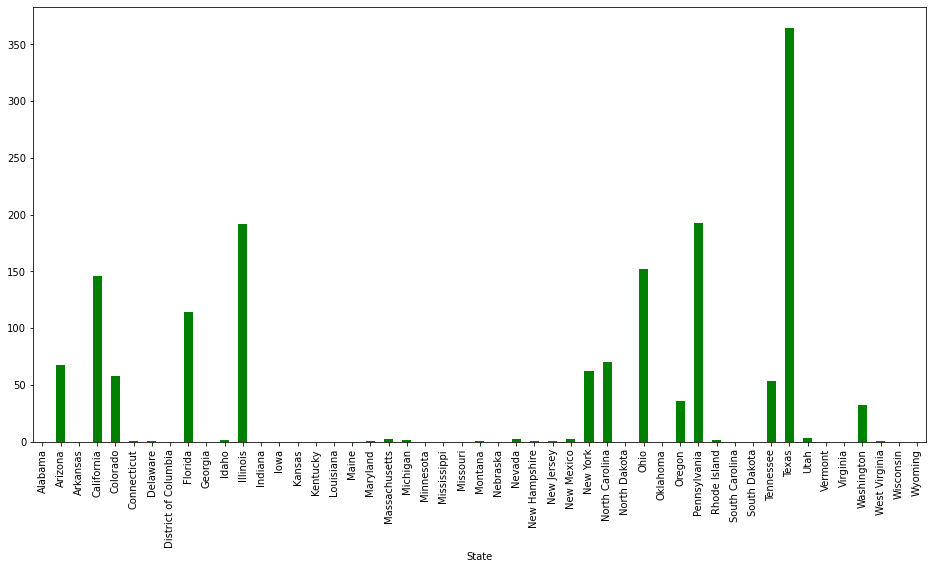

In [14]:
#Discount of the supermarket Statewise
s = df.groupby('State')['Discount'].sum()
s.plot.bar(figsize = (16,8), color='green')

<AxesSubplot:xlabel='State'>

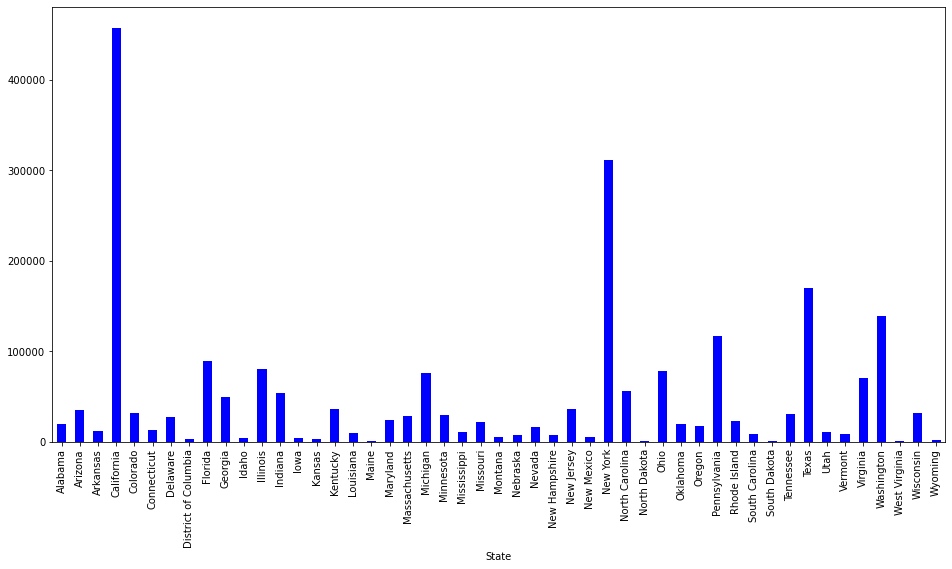

In [15]:
#Sales of supermarkets State wise
s = df.groupby('State')['Sales'].sum()
s.plot.bar(figsize = (16,8), color='blue')

<AxesSubplot:xlabel='State'>

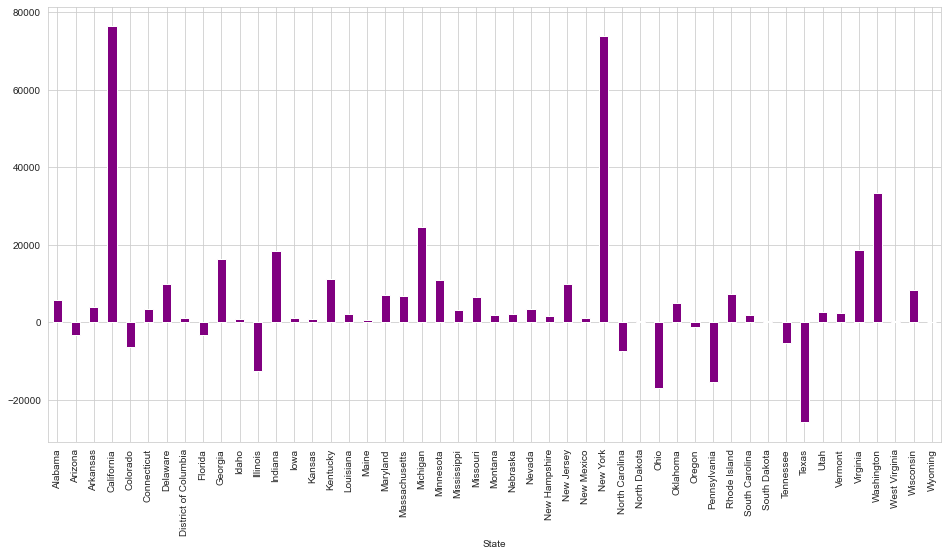

In [61]:
#profit based  on sum
s = df.groupby('State')['Profit'].sum()
s.plot.bar(figsize = (16,8), color='purple')

####  Bar plots can represent the following beautifully 

<AxesSubplot:xlabel='Category'>

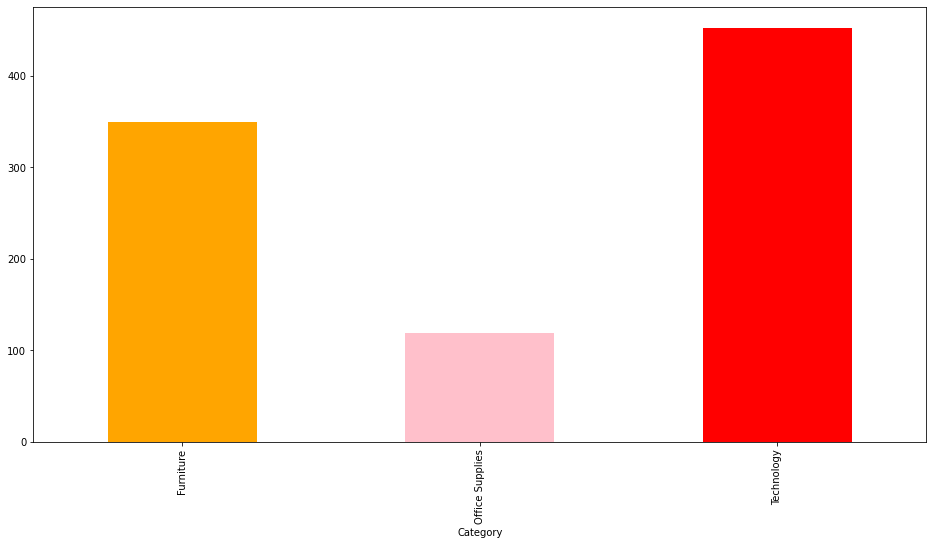

In [17]:
#plotting a bar graph
sk = df.groupby('Category')['Sales'].mean()
sk.plot.bar(figsize = (16,8), color=['orange', 'pink', 'red'])

<AxesSubplot:xlabel='Category'>

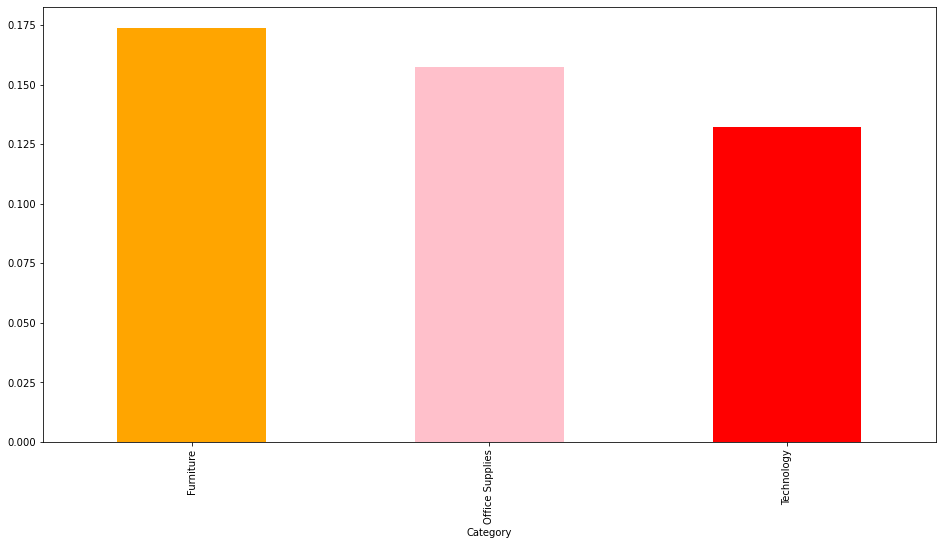

In [18]:
#Plotting based on categories 
skm = df.groupby('Category')['Discount'].mean()
skm.plot.bar(figsize = (16,8), color=['orange', 'pink', 'red'])
# we observe the highest discounts are in discount category

<AxesSubplot:xlabel='Category'>

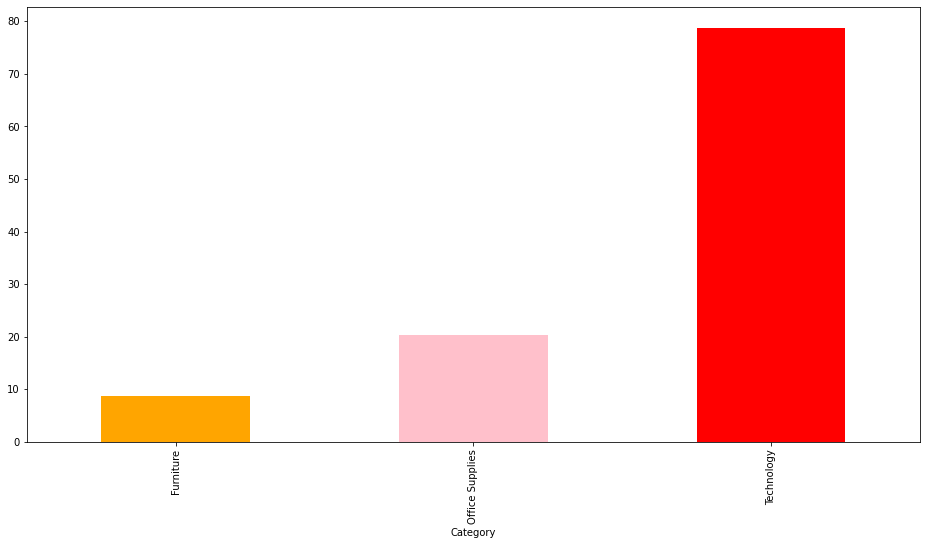

In [19]:
#plotting profits based on categories by the mean of values
s = df.groupby('Category')['Profit'].mean()
s.plot.bar(figsize = (16,8), color=['orange', 'pink', 'red'])
#the highes profits are for technology category 

<AxesSubplot:xlabel='Category'>

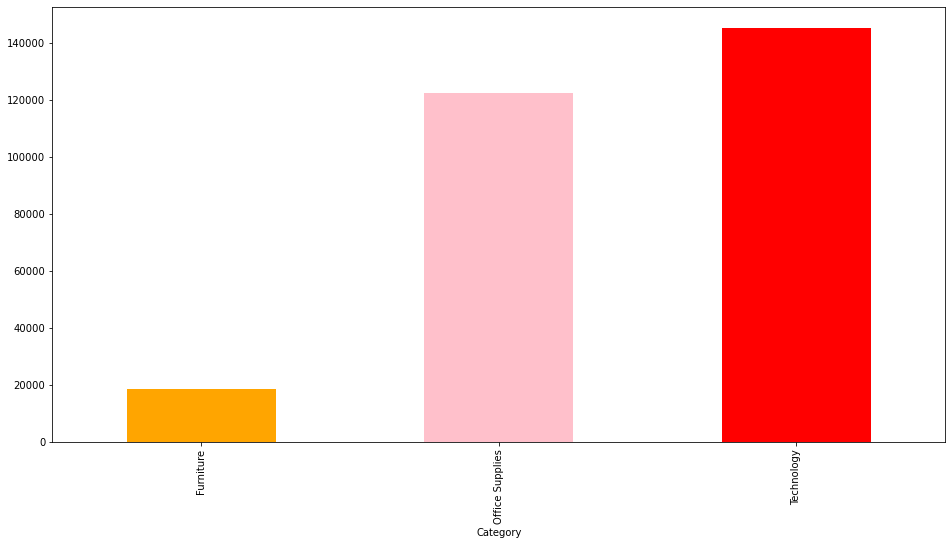

In [20]:
#plotting profits based on categories by the sum of values
s = df.groupby('Category')['Profit'].sum()
s.plot.bar(figsize = (16,8), color=['orange', 'pink', 'red'])
#the highes profits are for technology category 

<AxesSubplot:xlabel='Profit'>

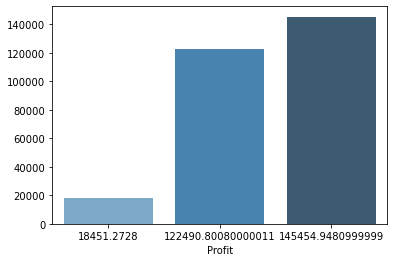

In [21]:
sns.barplot(data=s, x=s.index, y=s.values,palette='Blues_d')

In [22]:
#Diving segment into count and its index to get the pieplot
segment = df.Segment.value_counts().reset_index()
segment.columns = ('segment','Count')

In [23]:
segment

,segment,Count
0,Consumer,5191
1,Corporate,3020
2,Home Office,1783


([<matplotlib.patches.Wedge at 0x138da122130>,
 [Text(-0.13408036713364035, 2.1959103932422446, 'Consumer'),
  Text(-1.0537686579632295, -1.9312098838537397, 'Corporate'),
  Text(1.8633972391176687, -1.1695087555245793, 'Home Office')],
 [Text(-0.07313474570925836, 1.1977693054048604, '51.94%'),
  Text(-0.5747829043435797, -1.053387209374767, '30.22%'),
  Text(1.0163984940641828, -0.6379138666497705, '17.84%')])

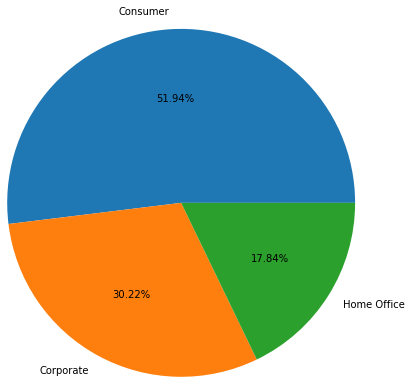

In [24]:
#plotting the pie plot
plt.pie(data=segment,x = 'Count',labels= 'segment', radius =2,autopct='%1.2f%%',)

<AxesSubplot:>

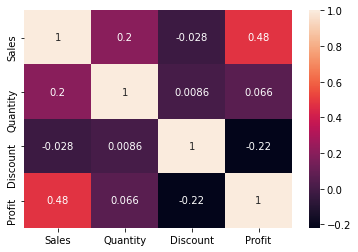

In [25]:
#checking the corrolation between each column 
sns.heatmap(data = df.corr(), annot=True)

<AxesSubplot:xlabel='State'>

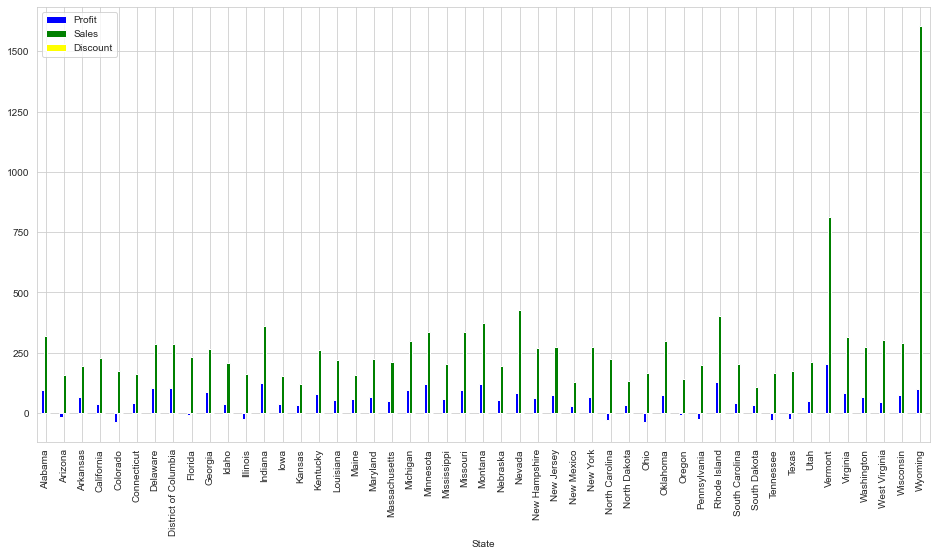

In [67]:
#you can see the variation for profit, sales and discount
km = df.groupby('State')['Profit','Sales','Discount'].mean()
km.plot.bar(figsize=(16,8), color=['b','g','yellow'])

<AxesSubplot:xlabel='State'>

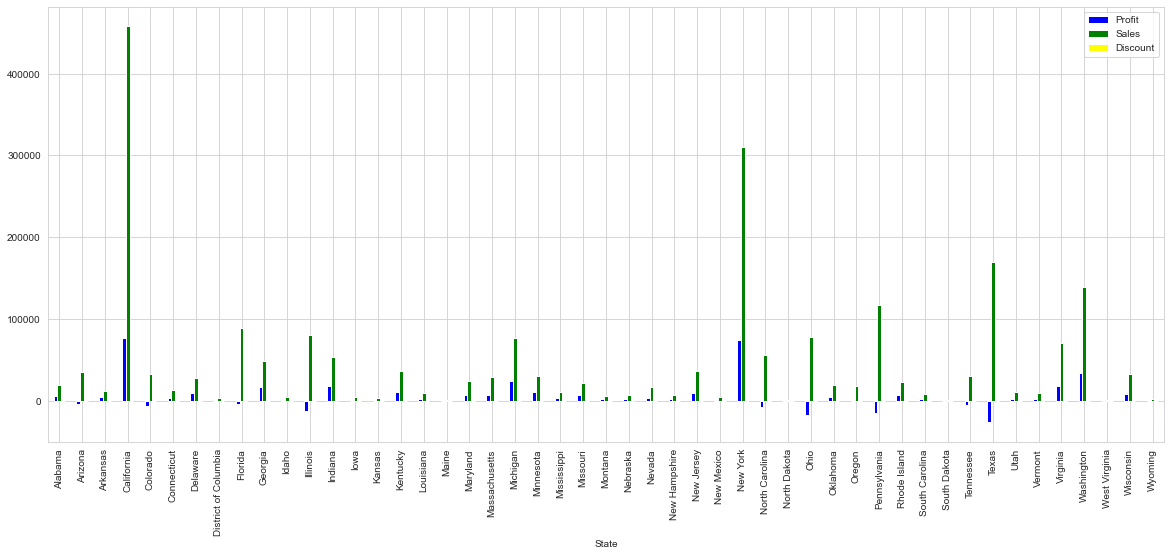

In [66]:
km = df.groupby('State')['Profit','Sales','Discount'].sum()
km.plot.bar(figsize=(20,8), color=['b','g','yellow'])

In [27]:
tim = df.groupby('Segment')['Profit','Sales','Discount'].sum()

array([<AxesSubplot:ylabel='Profit'>, <AxesSubplot:ylabel='Sales'>,
       <AxesSubplot:ylabel='Discount'>], dtype=object)

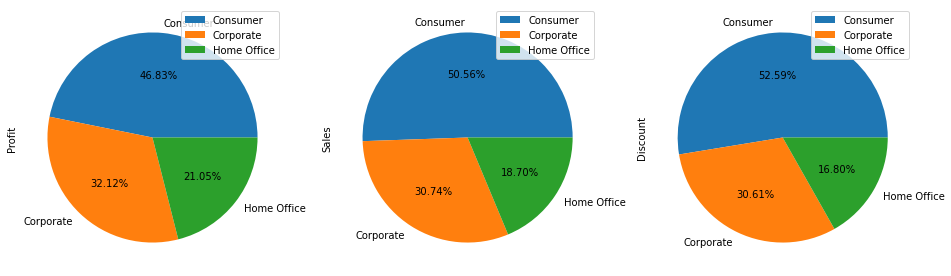

In [28]:
tim.plot.pie(subplots=True,labels=tim.index, figsize= (16,8),autopct='%1.2f%%')

array([<AxesSubplot:ylabel='Profit'>, <AxesSubplot:ylabel='Sales'>,
       <AxesSubplot:ylabel='Discount'>], dtype=object)

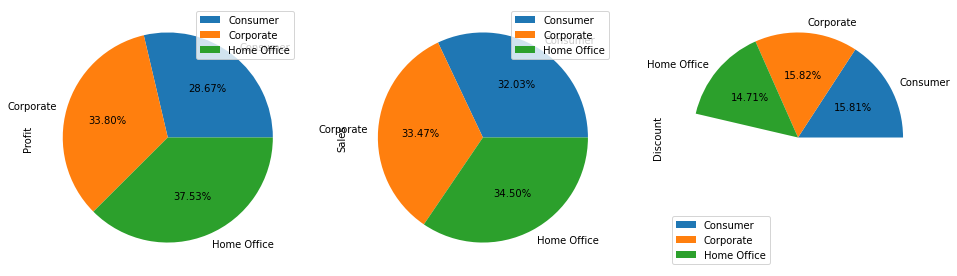

In [29]:
tim1 = df.groupby('Segment')['Profit','Sales','Discount'].mean()
tim1.plot.pie(subplots=True,labels=tim.index, figsize= (16,8),autopct='%1.2f%%')

array([<AxesSubplot:ylabel='Profit'>, <AxesSubplot:ylabel='Sales'>,
       <AxesSubplot:ylabel='Discount'>], dtype=object)

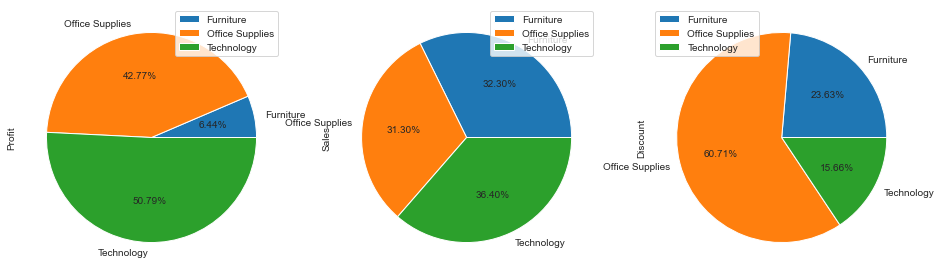

In [43]:
cat = df.Category.value_counts().reset_index()
cat.columns = ('category','Count')
tim1 = df.groupby('Category')['Profit','Sales','Discount'].sum()
tim1.plot.pie(subplots=True,labels=tim1.index, figsize= (16,8),autopct='%1.2f%%')

array([<AxesSubplot:ylabel='Profit'>, <AxesSubplot:ylabel='Sales'>,
       <AxesSubplot:ylabel='Discount'>], dtype=object)

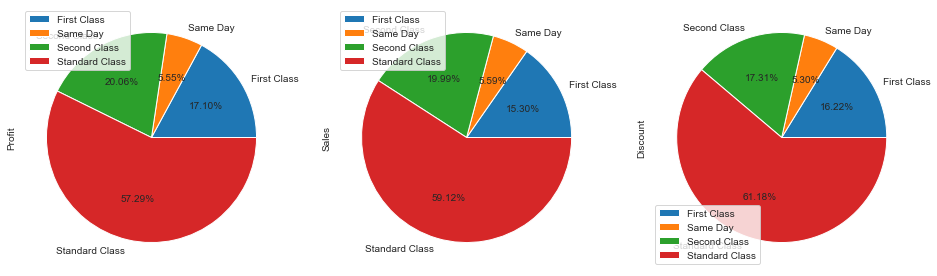

In [54]:
sm = df.shipmode.value_counts().reset_index()
sm.columns = ('shipmode','Count')
tim2 = df.groupby('shipmode')['Profit','Sales','Discount'].sum()
tim2.plot.pie(subplots=True,labels=tim2.index, figsize= (16,8),autopct='%1.2f%%')

<AxesSubplot:xlabel='Ship Mode'>

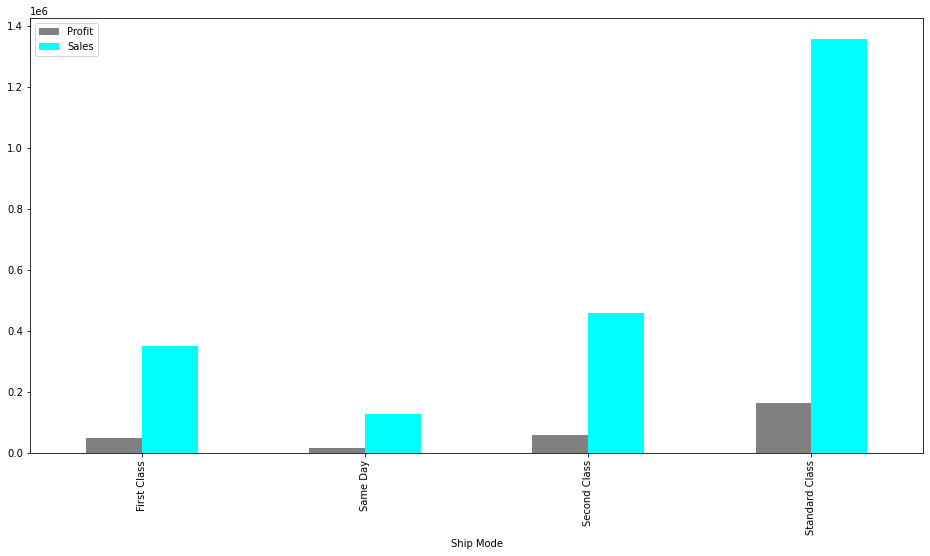

In [30]:
shm=df.groupby('shipmode')['Profit','Sales'].sum()
shm.plot.bar(figsize=(16,8),color=['grey','cyan'])

<function matplotlib.pyplot.show(close=None, block=None)>

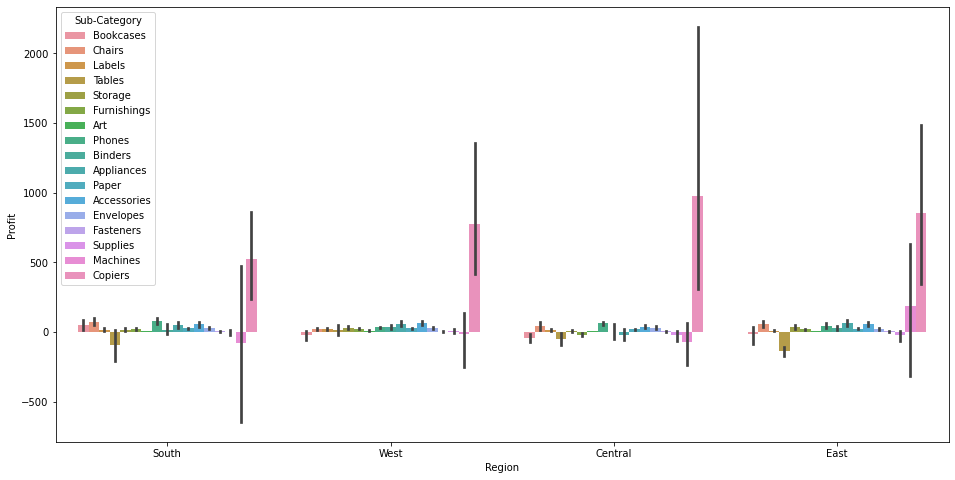

In [31]:
plt.figure(figsize=(16,8))
sns.barplot(data=df,x='Region', y='Profit',hue='Sub-Category')
plt.show

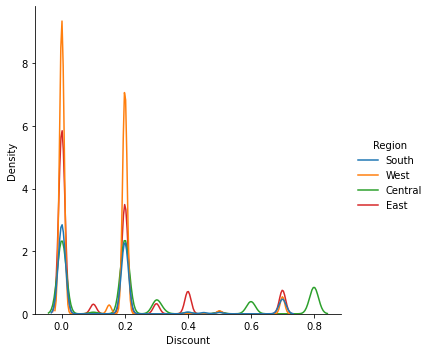

In [32]:
sns.displot(df, x="Discount", hue='Region',kind="kde", bw_adjust=.25)

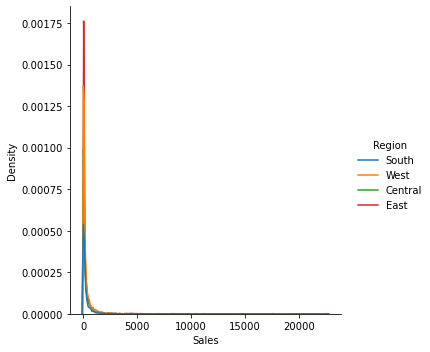

In [33]:
sns.displot(df, x="Sales", hue='Region',kind="kde", bw_adjust=.25)

In [34]:
df.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

####  Plot data between ship mode and Discount  based on the segment 
#### The more number of discounts are  for first class that too for corporate 

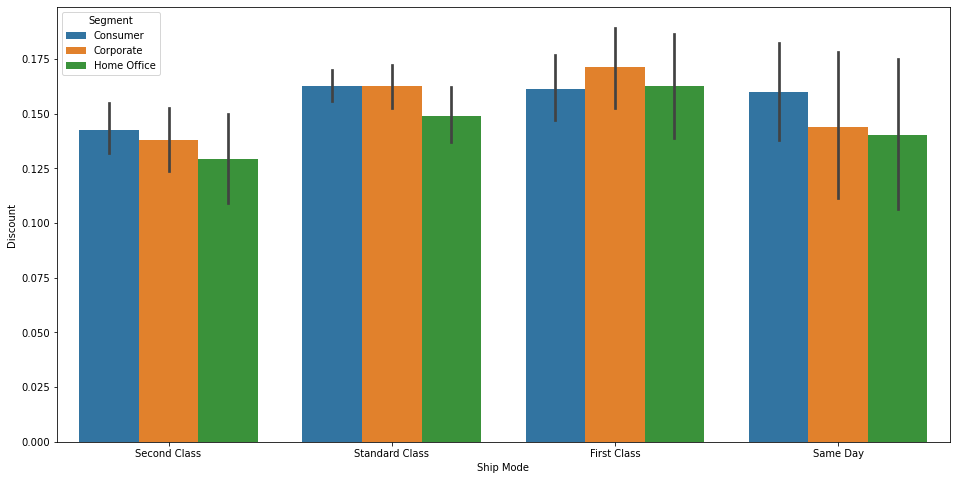

In [35]:
plt.figure(figsize=(16,8))
sns.barplot(data=df,x="Ship Mode", y="Discount", hue="Segment")
plt.show()

#### Plot data between Category and sales based on the regions
#### Here we can observe the plot and the Sales are more in technology than other categories

<AxesSubplot:xlabel='Category', ylabel='Sales'>

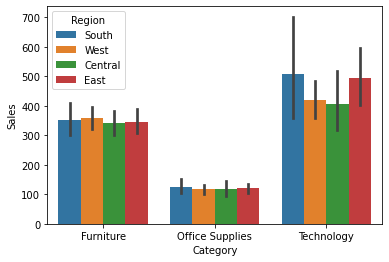

In [36]:
#bar plot based of different regions to get the sales of different categories 
sns.barplot(data=df,x='Category',y ='Sales',hue='Region')

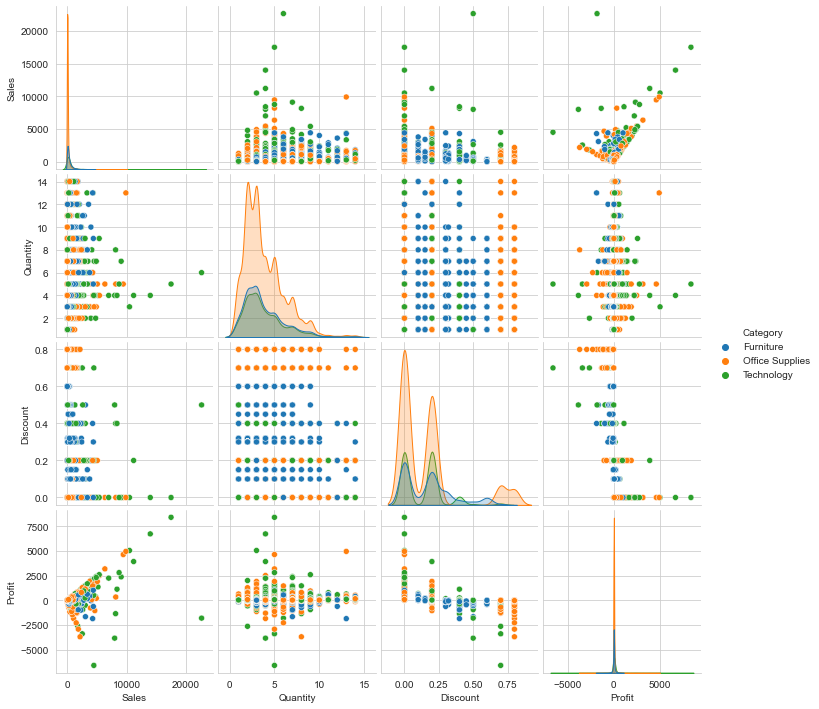

In [37]:
#
sns.set_style('whitegrid')
sns.pairplot(data=df,hue='Category')

([<matplotlib.patches.Wedge at 0x138dc7c7c40>,
 [Text(2.1096226183159814, 0.624093268902673, 'New York City'),
  Text(1.5167778721884304, 1.593544755078921, 'Los Angeles'),
  Text(0.7690273284908103, 2.0612124994852636, 'Philadelphia'),
  Text(0.06154126260054599, 2.1991390754105415, 'San Francisco'),
  Text(-0.5801938581261763, 2.12211571008573, 'Seattle'),
  Text(-1.0930052994662551, 1.9092771970928377, 'Houston'),
  Text(-1.4787902912139739, 1.62885827333482, 'Chicago'),
  Text(-1.7309995706046295, 1.3578072346863488, 'Columbus'),
  Text(-1.8847660668372799, 1.1347496963201755, 'San Diego'),
  Text(-1.9930157211784094, 0.931605246408427, 'Springfield'),
  Text(-2.0764943885981455, 0.7267537781947979, 'Dallas'),
  Text(-2.1326805951295915, 0.5400680319716133, 'Jacksonville'),
  Text(-2.167320139713906, 0.3777875222800463, 'Detroit'),
  Text(-2.187520362349253, 0.2339971459385653, 'Newark'),
  Text(-2.197422669683783, 0.10645943246042609, 'Richmond'),
  Text(-2.199964782379606, -0.012

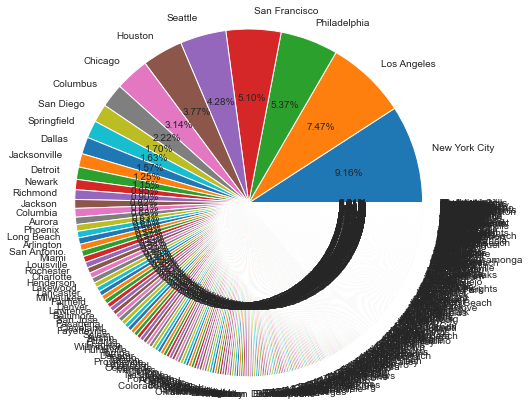

In [38]:
city = df.City.value_counts().reset_index()
city.columns = ('City','Count')
plt.pie(data = city, x='Count', labels = 'City', radius=2,autopct='%1.2f%%')
#As there are cities more than 500 the plot is a bit clumpsy

#### a beautiful plot using reg plot 

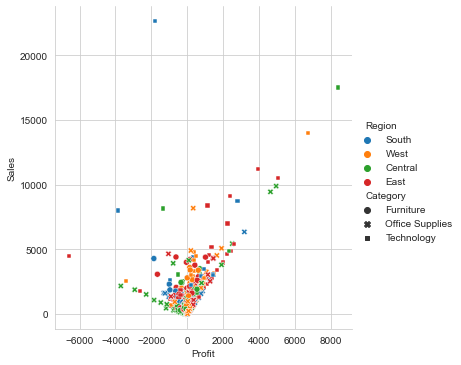

In [39]:
sns.relplot(
    data=df,
    x="Profit", y='Sales',
    hue="Region", style="Category",)

In [40]:
import plotly as pl
import plotly.express as px
import plotly.offline as pyo
import cufflinks as cf
from plotly.offline import init_notebook_mode,iplot, plot
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [41]:
px.bar(df, x="Region", y="Profit",
             color='Segment', barmode='group',
             height=400)

### the highest profit goes to state California
### highest sales in california 
### highest discounts provided to Texas 

## Based on category 
### 1.there are more discounts for furniture 
### 2. there are more Sales for technogy products 
### 3. there are more profits for technology 


## Thank you